# FINAL PROJECT 1 KAMPUS MERDEKA HACKTIV8
Nama Kelompok :
- Kezario Muhammad Anaqi (PYTN-KS04-005)
- Helmi Saifullah Mansur (PYTN-KS04-010)

## 1. Overview (Perkenalan)
#### **Latar Belakang**
Perkembangan teknologi semakin hari semakin tinggi seimbang dengan mobilitas manusia. Manusia melakukan perpindahan dari sutu tempat ke tempat lain dengan menggunakan kendaraan baik motor atau mobil. Dengan adanya perkembangan teknologi hal itu dapat diatasi salah satunya dengan adanya taksi online, dimana customer dapat memesan taksi dengan jenis yang diinginkan secara mudah dan praktis.

Namun tingginya permintaan taksi online menyebabkan banyak perusahaan berlomba untuk dapat memberikan pelayanan yang memuaskan. Dengan adanya data yang tersimpan, dapat dilakukan prediksi seperti tarif taksi berdasarkan pengaruh - pengaruhya berdasarkan data histori pemesanan.

#### **Dataset**
Dataset yang digunakan pada analisis ini yaitu Uber vs Lyft Dataset yang diunduh dari kaggle melalui [link berikut](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

Dataset ini berisikan data pemesanan taksi online yang dilengkapi dengan 57 atribut dengan 693071 rows. Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor.

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep regression dengan linear regression serta mempersiapkan data untuk digunakan dalam model linear regression

- Dapat mengimplementasikan linear regression untuk membuat prediksi tarif harga taksi berdasarkan faktor signifikan yang mempengaruhinya

- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga Taksi 

## 2. Import Pustaka yang Dibutuhkan

In [1]:
# import linrary (blm semuanya)
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import pickle

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

a. Melakukan loading data dengan menggunakan pandas



In [2]:
df = pd.read_csv('dataset/rideshare_kaggle.csv')

b. Melakukan setting untuk menampilkan semua kolom pada dataframe 

In [3]:
pd.set_option("display.max_columns", None)

c. Melihat 5 baris teratas pada dataset

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


d. Melihat 5 baris terbawah dari dataset

In [5]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


e. melihat dimensi dataset

In [6]:
df.shape

(693071, 57)

dapat dilihat dataset memiliki dimensi 57 kolom dan 693071 baris

f. melihat informasi (kolom, baris, tipe data) pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

dapat dilihat dataset memiliki 57 atribut dengan tipe data float64 sebanyak 29, int64 sebanyak 17, dan tipe data object sebanyak 11.

g. Melihat rincian nama kolom pada dataset

In [8]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

h. Mengecek apakah pada dataset terdapat missing value

In [9]:
df.isnull().values.any()

True

output menunjukkan 'True' yang berarti pada dataset masih terdapat missing value

i. Melihat statistik deskriptif dari masing-masing atribut yang bertipe numeric

In [10]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

j. Melihat statistik deskriptif dari masing-masing atribut yang bertipe object

In [11]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


k. Melihat banyaknya unique values pada masing-masing atribut

In [12]:
for col in df.columns:
    print(col,':', df[col].nunique())

id : 693071
timestamp : 36179
hour : 24
day : 17
month : 2
datetime : 31350
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
price : 147
distance : 549
surge_multiplier : 7
latitude : 11
longitude : 12
temperature : 308
apparentTemperature : 319
short_summary : 9
long_summary : 11
precipIntensity : 63
precipProbability : 29
humidity : 51
windSpeed : 291
windGust : 286
windGustTime : 25
visibility : 227
temperatureHigh : 129
temperatureHighTime : 23
temperatureLow : 133
temperatureLowTime : 31
apparentTemperatureHigh : 124
apparentTemperatureHighTime : 27
apparentTemperatureLow : 136
apparentTemperatureLowTime : 32
icon : 7
dewPoint : 313
pressure : 316
windBearing : 195
cloudCover : 83
uvIndex : 3
visibility.1 : 227
ozone : 274
sunriseTime : 110
sunsetTime : 114
moonPhase : 18
precipIntensityMax : 65
uvIndexTime : 20
temperatureMin : 131
temperatureMinTime : 25
temperatureMax : 128
temperatureMaxTime : 23
apparentTemperatureMin : 137
apparentTemperatureM

l. Mencoba melihat unique values pada kolom cab_type

In [13]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

dapat dilihat kolom cab_type memiliki 2 unique values yaitu 'Lyft' dan 'Uber'.

## 4. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

a. Melihat apakah terdapat duplikas data pada dataset

In [14]:
df.duplicated().sum()

0

b. Melihat apakah terdapat _missing values_/nilai yang hilang pada tiap kolom

In [15]:
df.isnull().sum() # NaN ada di kolom price

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

dari hasil diketahui missing value hanya terdapat pada kolom price

c. Melihat berapa persen missing value pada kolom price

In [16]:
a = df['price'].isnull().sum()
b = df.shape[0]
print('Jumlah missing value pada kolom price : {0} ({1:2.2f}%)'.format(a, (a/b)*100))

Jumlah missing value pada kolom price : 55095 (7.95%)


d. Mengisi _missing values_ dengan median dari keseluruhan nilai pada kolom

In [17]:
mdn = df['price'].median()
df['price'].fillna(mdn, inplace=True)
df.isnull().values.any()

False

setelah dilakukan penanganan missing value dengan median didapakan sudah tidak ada missing value lagi pada dataset

e. Melakukan penghapusan kolom yang tidak diperlukan

disini kami hanya akan menggunakan kolom `hour`, `day`, `month`, `datetime`, `source`, `destination`, `cab_type`, `name`, `price`, `distance`, `temperature`, `surge_multiplier` untuk melakukan prediksi dan menghapus kolom selain itu

In [18]:
drop_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude", "precipIntensity", "precipProbability", 
             "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", "temperatureLowTime", 
             "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", "apparentTemperatureLowTime", 
             "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", "sunsetTime", "uvIndexTime",
             "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", "apparentTemperatureMin", 
             "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", "apparentTemperature",
             "short_summary", "long_summary", "humidity", "windSpeed", "windGust", "visibility", "pressure",
             "cloudCover", "moonPhase", "precipIntensityMax"]

Melakukan penghapusan atribut dengan .drop

In [19]:
df = df.drop(drop_cols, axis=1)
df.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44


f. Memberikan nama baru pada untuk setiap kolom atau atribut

In [20]:
df = df.rename(columns={'hour':'Jam', 'day':'Hari', 'month':'Bulan', 'datetime':'Tanggal', 'source':'Asal', 
                          'destination':'Tujuan', 'cab_type':'Jenis_Taksi', 'name':'Merek', 'price':'Harga', 
                          'distance':'Jarak','temperature':'Suhu', 'surge_multiplier':'surge_multiplier'})

df.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Jenis_Taksi,Merek,Harga,Jarak,surge_multiplier,Suhu
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44


g. Melihat banyaknya nilai dari masing-masing atribut

In [21]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

Jam : 
0     32413
23    31931
16    30384
17    30384
12    30384
13    30384
18    30384
11    30384
14    30384
10    30384
15    30383
22    29436
9     28971
2     28548
1     28548
4     28330
3     27815
21    27732
19    27555
6     27336
20    26782
5     25008
7     24936
8     24275
Name: Jam, dtype: int64

 ############################################################ 

Hari : 
27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: Hari, dtype: int64

 ############################################################ 

Bulan : 
12    406614
11    286457
Name: Bulan, dtype: int64

 ############################################################ 

Tanggal : 
2018-11-26 23:21:14    156
2018-11-29 01:02:08    156
2018-11-26 23:33:14    156
2018-11-28 15:56:08    156
2018-11-28 14:29:08    156
                      ... 
2018-12-01 14:1

h. Membuat atribut atau kolom baru

disini kami membuat atribut atau kolom baru yaitu `Harga_Per_Mile`, yang didapatkan dengan menghitung `Harga` dibagi dengan `Jarak`

In [22]:
df['Harga_Per_Mile'] = df['Harga'] / df['Jarak']

# melihat data setelah ditambahkan atribut / kolom baru
df.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Jenis_Taksi,Merek,Harga,Jarak,surge_multiplier,Suhu,Harga_Per_Mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,20.454545


## 5. Explorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

a. Mencari tanggal pertama kali dan terakhir kali Uber dan Lyft menerima penumpang.

In [23]:
# Tanggal Uber
df.loc[df['Jenis_Taksi'] == 'Uber', 'Tanggal'].agg(('min', 'max'))

min    2018-11-26 03:40:46
max    2018-12-18 19:15:10
Name: Tanggal, dtype: object

In [24]:
# Tanggal Lyft
df.loc[df['Jenis_Taksi'] == 'Lyft', 'Tanggal'].agg(('min', 'max'))

min    2018-11-26 03:40:46
max    2018-12-18 19:15:10
Name: Tanggal, dtype: object

Dari hasil diketahui bahwa untuk jenis taksi Uber pertama kali menerima penumpang pada tanggal 26 November 2018 pukul 03:40:46 dan untuk pesanan penumpang terakhir kali dilakukan pada 18 Desember 2018 pukul 19:15:10

Sedangkan untuk jenis taksi Lyft pertama kali menerima penumpang pada tanggal 26 November 2018 pukul 03:40:46 dan untuk pesanan penumpang terakhir kali dilakukan pada 18 Desember 2018 pukul 19:15:10.

Hal ini dapat disimpulkan bahwa jenis taksi Uber dan Lyft melakukan operasi pada tanggal yang sama.

b. Mencari jarak terdekat dan terjauh pada Uber dan Lyft selama menerima penumpang.

In [25]:
# Jarak Uber
df.loc[df['Jenis_Taksi'] == 'Uber', 'Jarak'].agg(('min', 'max'))

min    0.02
max    7.86
Name: Jarak, dtype: float64

In [26]:
# Jarak Lyft
df.loc[df['Jenis_Taksi'] == 'Lyft', 'Jarak'].agg(('min', 'max'))

min    0.39
max    6.33
Name: Jarak, dtype: float64

Dari hasil diketahui bahwa untuk jenis taksi Uber menempuh jarak terdekat 0.02 dan jarak terjauh 7.86 selama menerima penumpang. Sedangkan untuk jenis taksi Lyft menempuh jarak terdekat 0.39 dan jarak terjauh 6.33 selama menerima penumpang

c. Mencari harga termurah dan termahal pada Uber dan Lyft selama menerima penumpang.

In [27]:
# Harga Uber
df.loc[df['Jenis_Taksi'] == 'Uber', 'Harga'].agg(('min', 'max'))

min     4.5
max    89.5
Name: Harga, dtype: float64

In [28]:
# Harga Lyft
df.loc[df['Jenis_Taksi'] == 'Lyft', 'Harga'].agg(('min', 'max'))

min     2.5
max    97.5
Name: Harga, dtype: float64

Dari hasil diketahui bahwa untuk jenis taksi Uber mendapat harga termurah yaitu 4.5 dollar dan harga termahal 89.5 dollar selama menerima penumpang. Sedangkan untuk jenis taksi Lyft mendapat harga termurah yaitu 2.5 dollar dan harga termahal 97.5 dollar selama menerima penumpang

d. Melihat proporsi data pada kolom `Jenis_Taksi` dan `Merek` dengan menggunakan crosstab

In [29]:
pd.crosstab(df.Jenis_Taksi, df.Merek)

Merek,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
Jenis_Taksi,,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55095,55091,55094,55096,55096


Dapat dilihat bahwa jenis taksi Lyft memiliki 6 merek sedangkan jenis taksi Uber memiliki 7 merek dan juga untuk proporsi data tidak memiliki perbedaan yang signifikan atau relatif sama.

e. Melihat rata-rata harga untuk masing-masing merek dengan melakukan grouping

In [30]:
mean_ = df[['Merek','Harga']].groupby('Merek').mean().sort_values(by='Harga', ascending=False)
mean_

,Harga
Merek,
Lux Black XL,32.324086
Black SUV,30.286763
Lux Black,23.062468
Black,20.523786
Lux,17.771240
UberXL,15.678144
Lyft XL,15.309363
Taxi,13.500000
UberX,9.765074


dapat dilihat bahwa untuk rata-rata harga paling tinggi diperoleh taksi dengan merek Lux Black XL sedangkan rata-rata harga paling rendah diperoleh taksi dengan merek Shared

f. Melihat data histori top 5 record pemesanan merek taksi Lux pada bulan November dengan tujuan Fenway dengan melakukan query

In [31]:
df[
    (df['Merek'] == 'Lux') &
    (df['Bulan'] == 11) &
    (df['Tujuan'] == 'Fenway')
].head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Jenis_Taksi,Merek,Harga,Jarak,surge_multiplier,Suhu,Harga_Per_Mile
146,18,28,11,2018-11-28 18:14:09,Beacon Hill,Fenway,Lyft,Lux,16.5,2.36,1.0,40.92,6.991525
480,1,29,11,2018-11-29 01:53:42,North Station,Fenway,Lyft,Lux,19.5,3.17,1.0,38.42,6.151420
491,11,28,11,2018-11-28 11:21:24,North Station,Fenway,Lyft,Lux,19.5,3.17,1.0,35.54,6.151420
941,15,28,11,2018-11-28 15:08:07,Financial District,Fenway,Lyft,Lux,27.5,4.51,1.0,41.24,6.097561
1095,6,29,11,2018-11-29 06:33:01,Theatre District,Fenway,Lyft,Lux,27.5,4.31,1.0,38.74,6.380510


g. Melihat statistik descriptif pada data numeric dan categorical setelah dilakukan data cleaning

In [32]:
df.describe()

,Jam,Hari,Bulan,Harga,Jarak,surge_multiplier,Suhu,Harga_Per_Mile
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,16.303056,2.189430,1.013870,39.584388,9.651978
std,6.948114,9.982286,0.492429,8.983913,1.138937,0.091641,6.726084,13.943560
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.556586
25%,6.000000,13.000000,11.000000,9.500000,1.280000,1.000000,36.450000,4.666667
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,7.403846
75%,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,43.580000,11.466165
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,1375.000000


In [33]:
df.describe(include='O')

,Tanggal,Asal,Tujuan,Jenis_Taksi,Merek
count,693071,693071,693071,693071,693071
unique,31350,12,12,2,13
top,2018-11-26 23:21:14,Financial District,Financial District,Uber,UberXL
freq,156,58857,58851,385663,55096


h. Membuat line plot correlation antara jarak dan harga berdasarkan jenis taksi

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


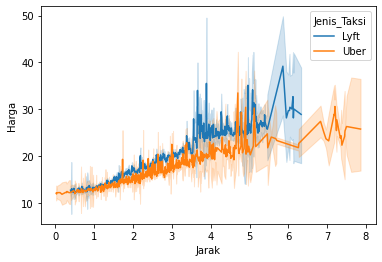

In [34]:
sns.lineplot('Jarak','Harga', hue='Jenis_Taksi', data=df)
plt.show()

Pada grafik terlihat tidak ada pola khusus correlation antara jarak dan harga berdasarkan jenis taksi

i. Visualisasi boxplot perbandingan jenis taksi berdasarkan jarak

Text(0.5, 1.0, 'Jenis Taksi vs Jarak')

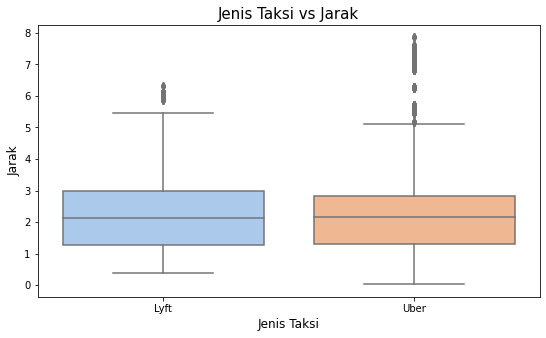

In [35]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Jenis_Taksi', y='Jarak', data=df, palette="pastel")

plt.xlabel("Jenis Taksi", fontsize= 12)
plt.ylabel("Jarak", fontsize= 12)
plt.title("Jenis Taksi vs Jarak", fontsize= 15)

Pada grafik Boxplot terlihat bahwa Uber memiliki jangkauan jarak yang cukup jauh dengan Lyft serta outlier Uber juga lebih banyak dari Lyft.

j. Melihat proporsi data Jenis Taksi dengan visualisasi histogram

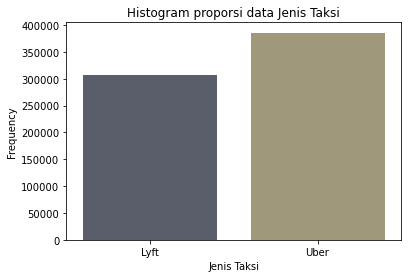

In [36]:
sns.countplot(x="Jenis_Taksi", data=df, palette="cividis")

plt.title('Histogram proporsi data Jenis Taksi') #add a title to the histogram
plt.ylabel('Frequency') #add y-label
plt.xlabel('Jenis Taksi') #add x-label
plt.show()

Diperoleh bahwa proporsi data antara Jenis Taksi Lyft lebih sedikit daripada Jenis Taksi Uber

k. Visualisasi pie chart persebaran data merek berdasarkan harga

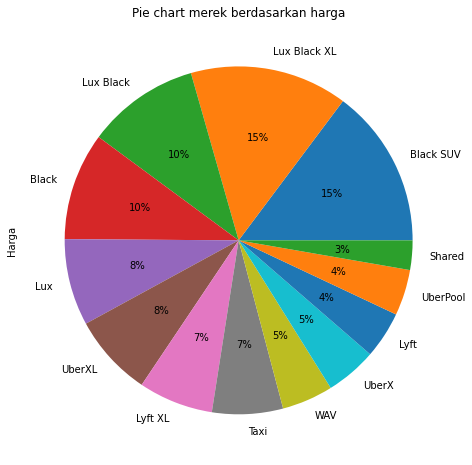

In [37]:
df_area = df.groupby(['Merek']).sum()['Harga'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(20,8), autopct='%1.0f%%')

plt.title("Pie chart merek berdasarkan harga")
plt.show()

dari grafik terlihat Merek Luxx Black XL dan Black SUV memiliki persebaran data paling banyak yaitu sebesar 15% dan Merek Shared memiliki persebaran data paling sedikitsebesar 3%

l. Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

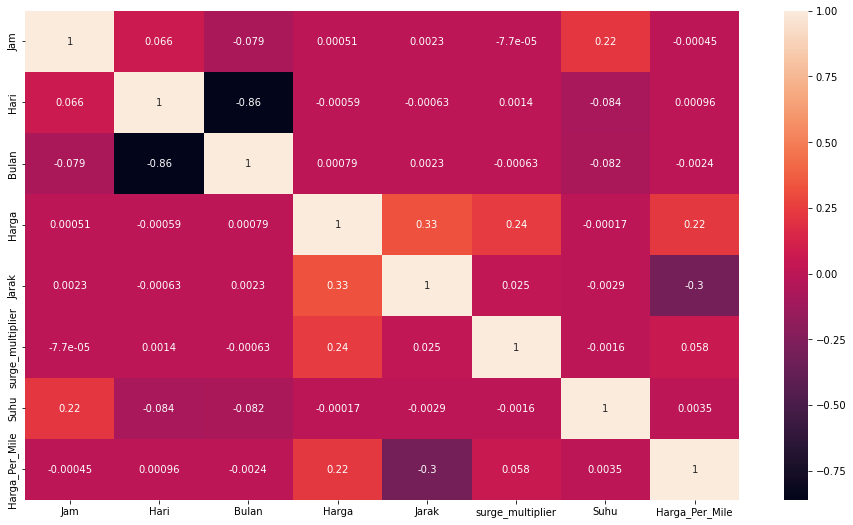

In [38]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

dari matriks korelasi kita dapat mengambil kesimpulan:
- Hari dan Bulan memiliki korelasi yang sangat rendah yaitu -0.86
- Harga dan Jarak memiliki korelasi yang cukup tinggi yaitu 0.33
- Harga dan surge_multiplier memiliki korelasi yang cukup tinggi ke 2 yaitu 0.24

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

a. Melakukan inisialisasi variabel X dan y

Disini kami mendefinisikan untuk variabel X nya yaitu kolom selain `Harga`, `Harga_Per_Mile` dan `Tanggal`, sedangkan untuk variabel y yaitu `Harga`

In [39]:
X = df.drop(['Harga', 'Harga_Per_Mile', 'Tanggal'], axis=1)
y = df['Harga']

print(X.shape)
print(y.shape)

(693071, 10)
(693071,)


b. Melakukan encoding pada float dan categorical columns dengan Label Encoder

untuk kolom object yaitu `Tanggal`, `Asal`, `Tujuan`, `Jenis_Taksi`, `Merek`, `Jarak`, dan `surge_multiplier`

In [40]:
encode = LabelEncoder()

df['Tanggal'] = encode.fit_transform(df['Tanggal'])
df['Asal'] = encode.fit_transform(df['Asal'])
df['Tujuan'] = encode.fit_transform(df['Tujuan'])
df['Jenis_Taksi'] = encode.fit_transform(df['Jenis_Taksi'])
df['Merek'] = encode.fit_transform(df['Merek'])
df['surge_multiplier'] = encode.fit_transform(df['surge_multiplier'])
df['Jarak'] = encode.fit_transform(df['Jarak'])

# Melihat 5 baris teratas dataset yang telah dilakukan encoding
df.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Jenis_Taksi,Merek,Harga,Jarak,surge_multiplier,Suhu,Harga_Per_Mile
0,9,16,12,25351,5,7,0,7,5.0,15,0,42.34,11.363636
1,2,27,11,961,5,7,0,2,11.0,15,0,43.58,25.000000
2,1,28,11,2534,5,7,0,5,7.0,15,0,38.33,15.909091
3,4,30,11,6988,5,7,0,4,26.0,15,0,34.38,59.090909
4,3,29,11,4400,5,7,0,6,9.0,15,0,37.44,20.454545


c. Melakukan inisialisasi ulang variabel X dan y setelah dilakukan encoding

In [41]:
X_transform = df.drop(['Harga', 'Harga_Per_Mile', 'Tanggal'], axis=1)
y = df['Harga']

print(X.shape)
print(y.shape)

(693071, 10)
(693071,)


d. Melakukan feature selection 

1. Feature Selection menggunakan library SequentialFeatureSelector dengan Metode Rergesi Linier, banyak atribut 5, metode forward, evaluasi dengan R squared, dan cv dengan k=3.

In [42]:
sequential = SequentialFeatureSelector(LinearRegression(),
                                       k_features=6,
                                       forward=True,
                                       floating=False,
                                       scoring = 'r2', 
                                       cv = 3)

In [43]:
sequential.fit(X_transform, y)
sequential.k_feature_names_

('Asal', 'Tujuan', 'Jenis_Taksi', 'Merek', 'Jarak', 'surge_multiplier')

dengan menggunakan library SequentialFeatureSelector didapatkan bahwa 6 feature yang paling berpengaruh dalam model yaitu `Asal`, `Tujuan`, `Jenis_Taksi`, `Merek`, `Jarak`, `surge_multiplier`

2. Feature Selection menggunakan library F regression dengan k=6

In [44]:
topFeatures = SelectKBest(f_regression, k=6)
fit = topFeatures.fit(X_transform, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 5 Features yang Berpengaruh")
print(featureScores.nlargest(6, 'Score'))

Top 5 Features yang Berpengaruh
           Features          Score
6             Merek  358425.591811
7             Jarak   84977.278050
8  surge_multiplier   44162.616118
5       Jenis_Taksi    7604.960908
4            Tujuan    1361.091110
3              Asal     408.027999


dengan menggunakan library F regression juga didapatkan bahwa 5 feature yang paling berpengaruh dalam model yaitu `Asal`, `Tujuan`, `Jenis_Taksi`, `Merek`, `Jarak`, dan `surge_multiplier`

e. Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan

In [45]:
X_fit = df[['Asal', 'Tujuan', 'Jenis_Taksi', 'Merek', 'Jarak', 'surge_multiplier']]

f. Melihat 5 baris teratas dataframe X_fit

In [46]:
X_fit.head()

,Asal,Tujuan,Jenis_Taksi,Merek,Jarak,surge_multiplier
0,5,7,0,7,15,0
1,5,7,0,2,15,0
2,5,7,0,5,15,0
3,5,7,0,4,15,0
4,5,7,0,6,15,0


g. melihat informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit

In [47]:
X_fit.info()

X_fit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Asal              693071 non-null  int32
 1   Tujuan            693071 non-null  int32
 2   Jenis_Taksi       693071 non-null  int32
 3   Merek             693071 non-null  int32
 4   Jarak             693071 non-null  int64
 5   surge_multiplier  693071 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 21.2 MB


(693071, 6)

h. Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=13)

In [49]:
print(X_train.shape)
print(X_test.shape)

(554456, 6)
(138615, 6)


Berdasarkan pembagian proporsi training data/data latih dan testing data/data uji, didapatkan jumlah **data training dari keseluruhan data sebanyak 554456 data**, serta **data testing sebanyak 138615 data**.

## 7. Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. seperti penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Disini kami akan mencoba mendefinisikan 2 model diantaranya
1. Model regresi linear dimana memberikan nilai False pada fit_intercept. Alasan dari menghilangkan nilai intersep yaitu karena variabel y (Harga) tidak bisa berdiri sendiri tanpa adanya faktor atau variabel X yang mempengaruhi. Jika tidak ada nilai pada variabel X atau tidak ada faktor yang mempengaruhi maka nilai dari variabel y (Harga) seharusnya yaitu 0. Maka dari itu intercept dihilangkan

In [50]:
linreg1 = LinearRegression(fit_intercept = False)

2. Model regresi linear dimana dilakukan normalisasi data dengan mean (rata-rata) menggunakan standard scaler. Alasan dilakukannya normalisasi karen atribut atau kolom yang digunakan untuk prediksi memiliki variasi pada data satuan, sehingga hal itu dapat diatasi dengan melakukan normalisasi data

In [51]:
linreg2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

## 8. Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

1. Model training untuk pendefinisian model nomor 1

In [52]:
model1 = linreg1.fit(X_train, y_train)
model1

LinearRegression(fit_intercept=False)

2. Model training untuk pendefinisian model nomor 2

In [53]:
model2 = linreg2.fit(X_train, y_train)
model2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## 9. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

1. Evaluasi Model nomor 1

In [54]:
y_pred = model1.predict(X_test)

r2_train_linreg = linreg1.score(X_train, y_train)
print('R2 (R squared) score for Linear Regression train is %.4f' % r2_train_linreg)

r2_test_linreg = r2_score(y_test,y_pred)
print('R2 (R squared) score for Linear Regression test is %.4f' % r2_test_linreg)

linreg_mse = mean_squared_error(y_test, y_pred)
print('mean_sqrd_error of Linear Regression is %.4f' % linreg_mse)
linreg_rmse = np.sqrt(linreg_mse)
print('root mean squared error of Linear Regression is %.4f' % linreg_rmse)

R2 (R squared) score for Linear Regression train is 0.2114
R2 (R squared) score for Linear Regression test is 0.2108
mean_sqrd_error of Linear Regression is 63.3529
root mean squared error of Linear Regression is 7.9595


Membuat visualisasi model 1 dengan x axis yaitu atribut `Jarak` karena memiliki korelasi tinggi dengan y (atribut `Harga`)

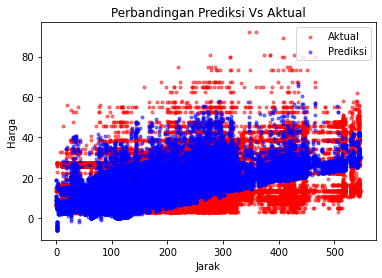

In [55]:
x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'r', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'b', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Harga') 
plt.title("Perbandingan Prediksi Vs Aktual")
plt.legend(loc = 'upper right')
plt.show()

didapatkan dengan menggunakan model 1 score R2 yang didapatkan yaitu 0.2108 (21,08%). nilai ini tentunya cukup kecil sehingga bisa saja nanti hasil prediksi tidak akurat. Kami akan coba dengan menggunakan model 2

2. Evaluasi Model nomor 2

In [56]:
y_pred = model2.predict(X_test)

r2_train_linreg = linreg2.score(X_train, y_train)
print('R2 (R squared) score for Linear Regression train is %.4f' % r2_train_linreg)

r2_test_linreg = r2_score(y_test,y_pred)
print('R2 (R squared) score for Linear Regression test is %.4f' % r2_test_linreg)

linreg_mse = mean_squared_error(y_test, y_pred)
print('mean_sqrd_error of Linear Regression is %.4f' % linreg_mse)
linreg_rmse = np.sqrt(linreg_mse)
print('root mean squared error of Linear Regression is %.4f' % linreg_rmse)

R2 (R squared) score for Linear Regression train is 0.5070
R2 (R squared) score for Linear Regression test is 0.5101
mean_sqrd_error of Linear Regression is 39.3233
root mean squared error of Linear Regression is 6.2708


Membuat visualisasi model 2 dengan x axis yaitu atribut `Jarak` karena memiliki korelasi tinggi dengan y (atribut `Harga`)

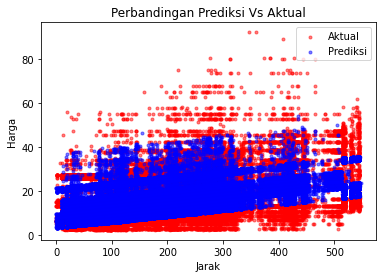

In [57]:
x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'r', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'b', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Harga') 
plt.title("Perbandingan Prediksi Vs Aktual")
plt.legend(loc = 'upper right')
plt.show()

Melihat summary regression result dari model 2

In [58]:
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Harga   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                 2.406e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:22:22   Log-Likelihood:            -4.5116e+05
No. Observations:              138615   AIC:                         9.023e+05
Df Residuals:                  138608   BIC:                         9.024e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.1110      0.062  

Dengan menggunakan model 2 didapatkan nilai R2 score nya yaitu 0.510 atau hanya 51%. Meskipun hasil score lebih tinggi dari model 1 tetapi kita tetap tidak bisa menggunakannnya karena hasil ini masih tergolong rendah dan bisa mempengaruhi hasil prediksi nantinya.

Maka dari itu kami melakukan peningkatan score atau akurasi dengan melakukan pemodelan dengan menggunakan Random Forest Regressor

### Peningkatan Akurasi Menggunakan Random Forest Regressor
disini kami membuat model baru menggunakan random forest regressor untuk meningkatan hasil score accuracy agar hasil prediksi baik. untuk parameter yang digunakan yaitu n_estimator sejumlah 100
1. Mendefinisikan model

In [59]:
rf_regr = RandomForestRegressor(n_estimators=100)

2. Pelatihan Model

In [60]:
model3 = rf_regr.fit(X_train, y_train)
model3

RandomForestRegressor()

3. Evaluasi Model

In [61]:
y_pred = model3.predict(X_test)

r2_train_linreg = rf_regr.score(X_train, y_train)
print('R2 (R squared) score for Linear Regression train using Random Forest Regressor is %.4f' % r2_train_linreg)

r2_test_linreg = r2_score(y_test,y_pred)
print('R2 (R squared) score for Linear Regression test using Random Forest Regressor is %.4f' % r2_test_linreg)

linreg_mse = mean_squared_error(y_test, y_pred)
print('mean_sqrd_error of Linear Regression using Random Forest Regressor is %.4f' % linreg_mse)
linreg_rmse = np.sqrt(linreg_mse)
print('root mean squared error of Linear Regression using Random Forest Regressor is %.4f' % linreg_rmse)

R2 (R squared) score for Linear Regression train using Random Forest Regressor is 0.9732
R2 (R squared) score for Linear Regression test using Random Forest Regressor is 0.9697
mean_sqrd_error of Linear Regression using Random Forest Regressor is 2.4332
root mean squared error of Linear Regression using Random Forest Regressor is 1.5599


Membuat visualisasi model 2 dengan x axis yaitu atribut `Jarak` karena memiliki korelasi tinggi dengan y (atribut `Harga`)

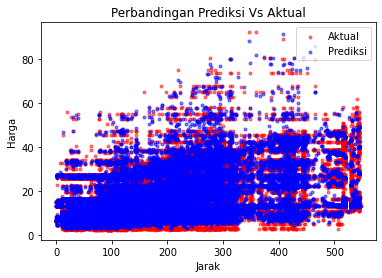

In [62]:
x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'r', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'b', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Harga') 
plt.title("Perbandingan Prediksi Vs Aktual")
plt.legend(loc = 'upper right')
plt.show()

didapatkan dengan mengganti model menggunakan Random forest Regressor R2 score nya yaitu 0.9697 (96,97% atau 97%). Score ini tentunya baik dan hasilnya tinggi mendekati nilai 1. 

Untuk deployment nantinya kami akan menggunakan model ini sedangkan untuk model inference kami akan membuat 2 versi yaitu menggunakan moel 2 dan model 3

## 10. Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia.

#### Petunjuk Pengisian
- Asal dan Tujuan diisi dengan nomor 0 sampai 11 dengan rincian

`0. Back Bay`
`1. Beacon Hill`
`2. Boston University`
`3. Fenway`
`4. Financial District`
`5. Haymarket Square`
`6. North End`
`7. North Station`
`8. Northeastern University`
`9. South Station`
`10. Theatre District`
`11. West End`

- Jenis Taksi diisi dengan memilih nomor 0 atau 1 dengan rincian:

`0. Lyft` dan `1. Uber`

- Merek diisi dengan nomor antara 0 sampai 12 dengan rincian:

`0. Black`
`1. Black SUV`
`2. Lux`
`3. Lux Black`
`4. Lux Black XL`
`5. Lyft`
`6. Lyft XL`
`7. Shared`
`8. Taxi`
`9. UberPool`
`10. UberX`
`11. UberXL`
`12. WAV`

- Jarak diisi sesuai dengan angka yang ingin diprediksi atau ditempuh

- surge multiplier diisi dengan angka minimal 0 sampai 6


1. Model Inference dari Model 2

a. Memasukkan parameter input masing-masing atribut

In [63]:
Asal = int(input('Asal : '))
Tujuan = int(input('Tujuan : '))
Jenis = int(input('Jenis Taksi : '))
Merek = int(input('Merek : '))
Jarak = int(input('Jarak : '))
SM = int(input('Surge Multiplier : '))

Asal : 3
Tujuan : 6
Jenis Taksi : 1
Merek : 9
Jarak : 2
Surge Multiplier : 3


b. Menampung parameter input ke dalam variabel X_pred

In [64]:
X_pred = [[Asal, Tujuan, Jenis, Merek, Jarak, SM]]
X_pred

[[3, 6, 1, 9, 2, 3]]

c. Melihat hasil prediksi

In [65]:
y_pred = model2.predict(X_pred)
print('Hasil Prediksi Harga : ', y_pred)

Hasil Prediksi Harga :  [23.73065498]


didapatkan dengan menggunakan model 2 dengan melakukan prediksi dengan Asal Haymarket Square, Tujuan North Station, Jenis Taksi Lyft, Merek Lux, Jarak 0.44, dan Surge Multiplier 1.0 didapatkan hasil prediksi harganya yaitu 15.94524141 atau 15.9. Pada data seharusnya 11.0, hasil lebih banyak mungkin dikarenakan dari hasil score prediksi model 2 yang cukup rendah

2. Model Inference dari model 3 (Random Forest Regressor)

a. Memasukkan parameter input masing-masing atribut

In [66]:
Asal_ = int(input('Asal : '))
Tujuan_ = int(input('Tujuan : '))
Jenis_ = int(input('Jenis Taksi : '))
Merek_ = int(input('Merek : '))
Jarak_ = int(input('Jarak : '))
SM_ = int(input('Surge Multiplier : '))

Asal : 3
Tujuan : 6
Jenis Taksi : 1
Merek : 9
Jarak : 2
Surge Multiplier : 3


b. Menampung parameter input ke dalam variabel X_pred

In [67]:
X_pred1 = [[Asal_, Tujuan_, Jenis_, Merek_, Jarak_, SM_]]
X_pred1

[[3, 6, 1, 9, 2, 3]]

c. Melihat hasil prediksi

In [68]:
y_pred = model3.predict(X_pred1)
print('Hasil Prediksi Harga : ', y_pred)

Hasil Prediksi Harga :  [5.54008328]


didapatkan dengan menggunakan model 3 yaitu Random Forest Regressor dengan melakukan prediksi dengan Asal Haymarket Square, Tujuan North Station, Jenis Taksi Lyft, Merek Lux, Jarak 0.44, dan Surge Multiplier 1.0 didapatkan hasil prediksi harganya yaitu 10.7163254 atau 10.7. Pada data hasilnya yaitu 11.0, Hasil prediksi sudah mendekati sesuai data aslinya. Jadi bisa dikatakan prediksi bisa dilanjutkan ke deployment

Untuk model inference diatas kami coba berdasarkan data untuk mengecek akurasi prediksi. Model inference dapat dicoba sesuai dengan input yang diinginkan selain data yang ada

Jadi untuk deployment kami menggunakan model 3 yaitu Random Forest Regressor. *Kode program juga bisa di run lagi dan diisi dengan data yang diinginkan.*

### Save and Finalize Model
disini kami menggunakan operasi Pickle untuk menyimpan format serialized ke sebuah file dan menggunakannya untuk membuat prediksi baru

In [69]:
pickle.dump(model3, open('model_RFRegr_FP1.pkl', 'wb'))

## 11. Pengambilan Kesimpulan
Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
- Pada Dataset terdapat 56 atribut yang diperkirakan sebagai faktor yang mempengaruhi harga taksi, Namun setelah dilakukan analisis kami menyimpulkan bahwa hanya terdapat 6 atribut yang menjadi faktor kuat yang paling mempengaruhi harga taksi yaitu atribut `Asal`, `Tujuan`, `Jenis_Taksi`, `Merek`, `Jarak`, dan `surge_multiplier`
- Untuk mengatasi missing value pada analisis ini kami menggunakan pengisian missing value dengan menggunakan median
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi
- Pada analisis ini variabel dependen atau target yang digunakan yaitu `Harga` dan variabel independen yang digunakan yaitu `Asal`, `Tujuan`, `Jenis_Taksi`, `Merek`, `Jarak`, dan `surge_multiplier`
- Pada analisis kami mengubah data yang bertipe float dan categorical menjadi numeric dengan mengunakan library Label Encoder
- Pada proses feaure selection kami menggunakan library SequentialFeatureSelector dan library F regression dengan mengambil 6 atribut yang paling berpengaruh
- Pada analisis ini kami membagi data menjadi Training dan Testing dengan proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)
- Model awal yang kami bangun yaitu Model regresi linear dimana dilakukan normalisasi data dengan mean (rata-rata) menggunakan standard scaler. Alasan dilakukannya normalisasi karena atribut atau kolom yang digunakan untuk prediksi memiliki variasi pada data satuan, sehingga hal itu dapat diatasi dengan melakukan normalisasi data. Dengan model ini didapatkan **R2 score 0.510 (51%)**
- Kami juga melakukan peningkatan akurasi pada model awal dikarenakan hasil score yang begitu rendah. Kami melakukan peningkatan akurasi menggunakan metode Random Forest Regressor yang didapatkan hasil akurasi **0.9697 (96,97% atau 97%)**
- Untuk tahap model inference kami membuat 2 versi yaitu dengan model regresi linear dan model Random Forest Regressor. Namun untuk deployment menggunakan Model Random Forest Regressor
- Untuk proses deployment prediksi harga taksi kami menggunakan model dengan metode Random Forest Regressor dengan hasil akurasi yang baik